In [1]:
# Importing Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
# Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Dataset:
df = pd.read_csv("dataset (1).csv")
'''
1 = male , 0 = female

'''
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# first five rows:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Last five rows:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Summary Statistics:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [8]:
# Data Cleaning:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(302, 14)

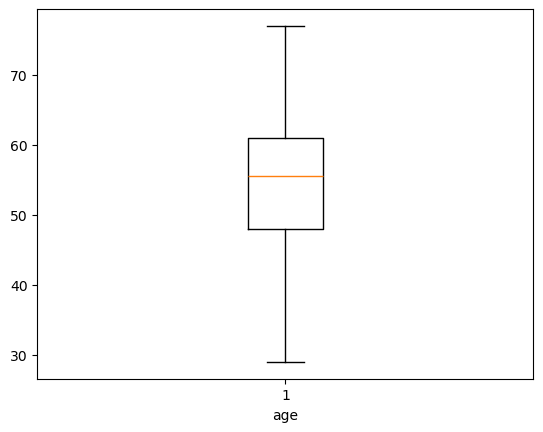

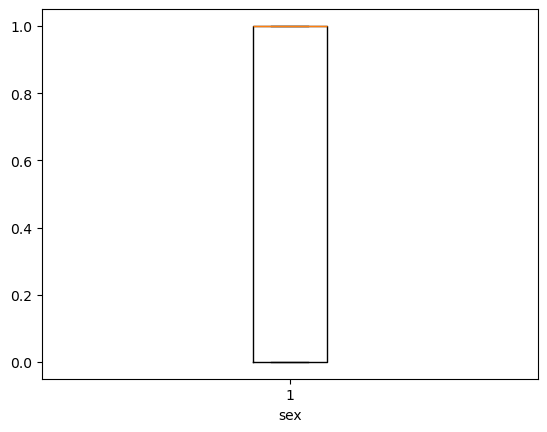

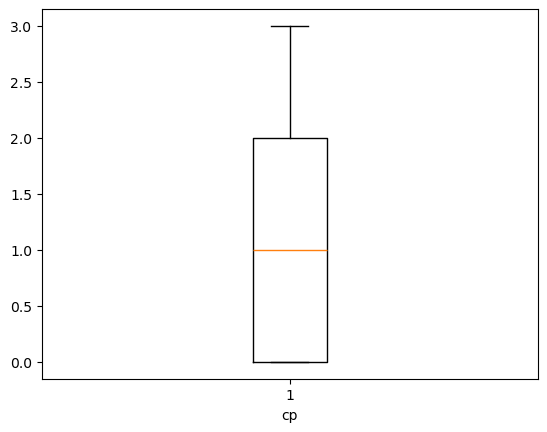

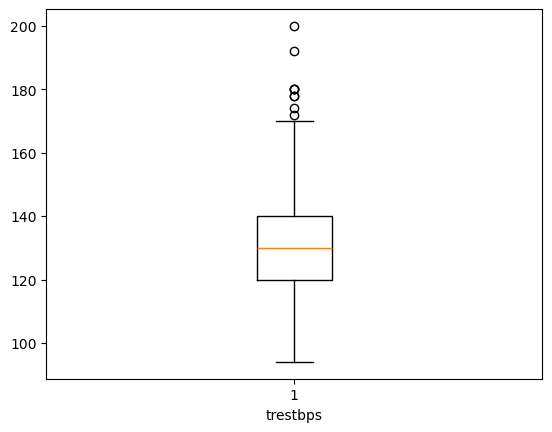

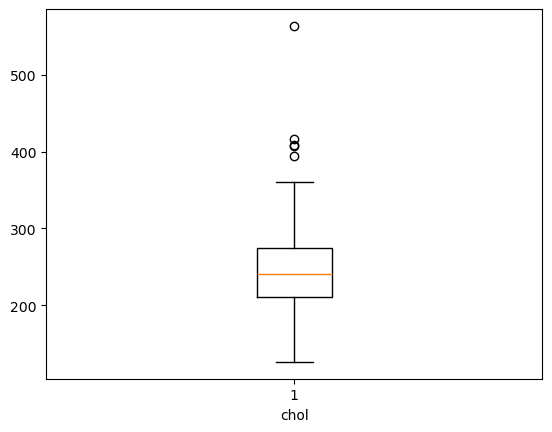

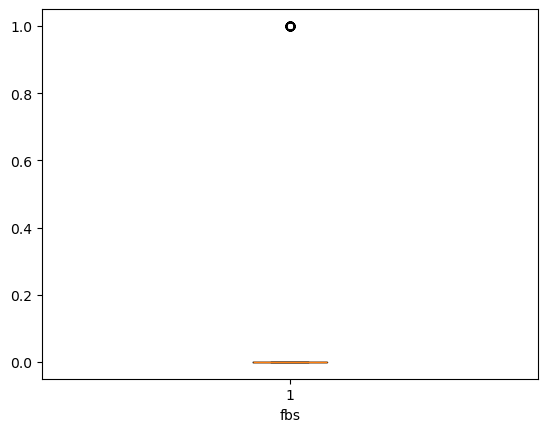

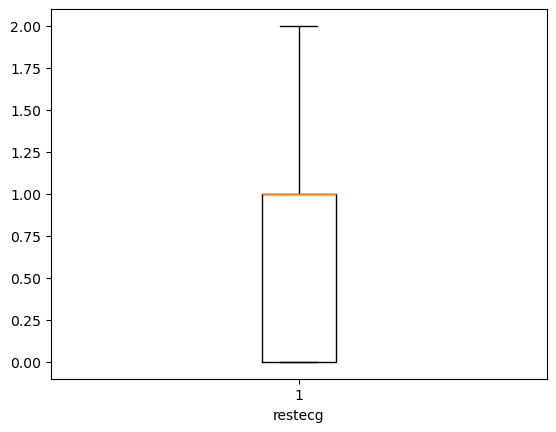

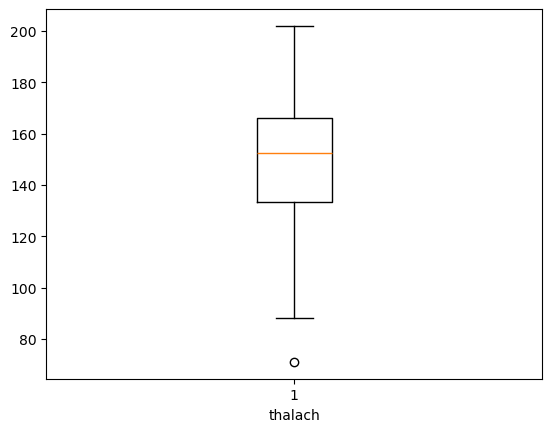

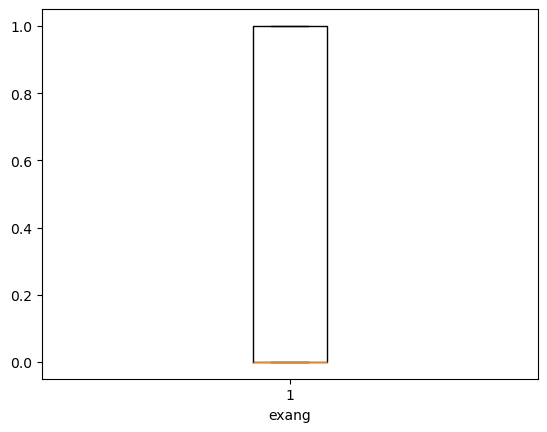

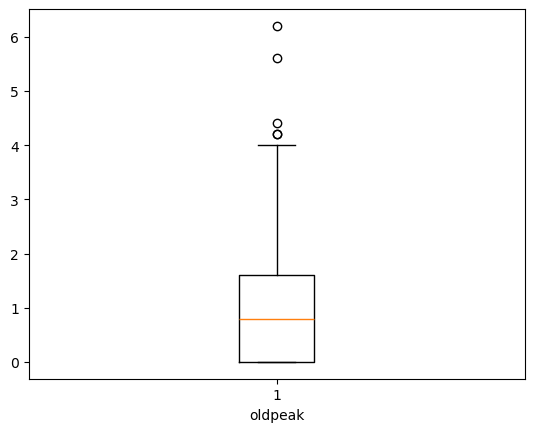

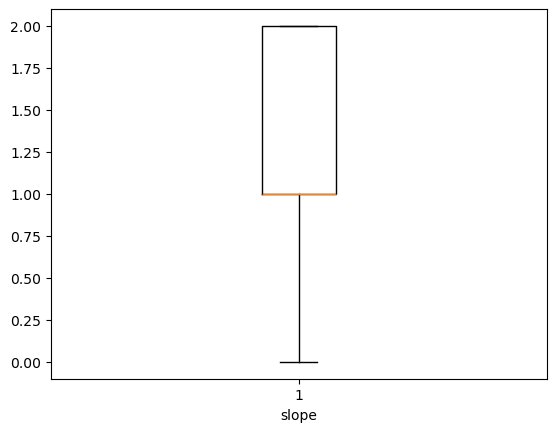

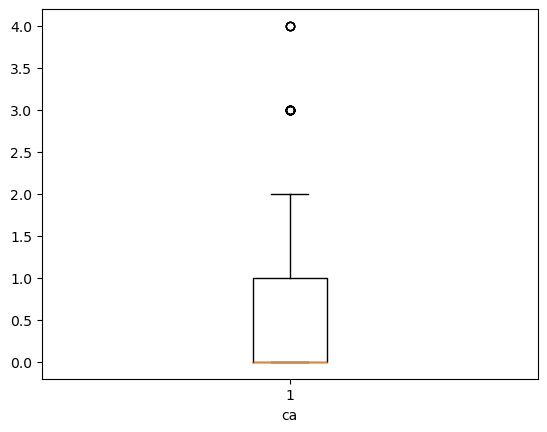

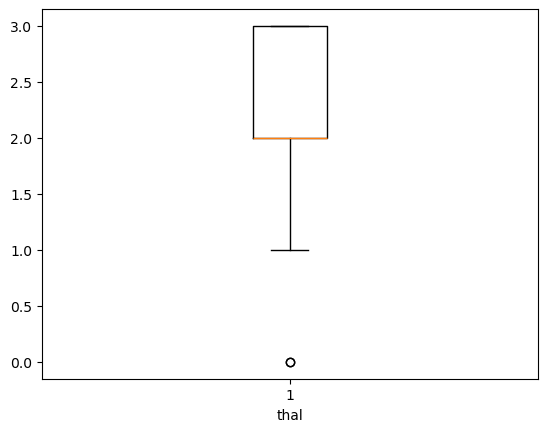

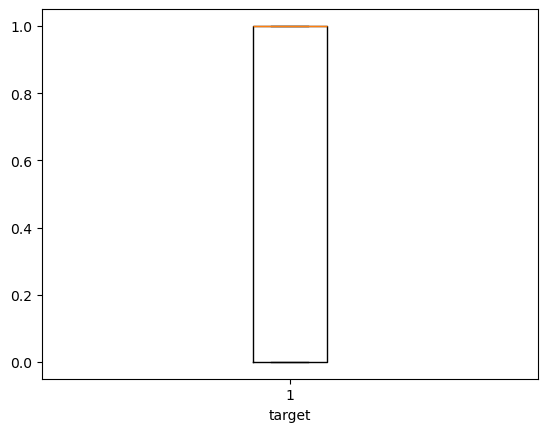

In [13]:
for i in df.columns:
  plt.boxplot(df[i])
  plt.xlabel(i)
  plt.show()

In [14]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


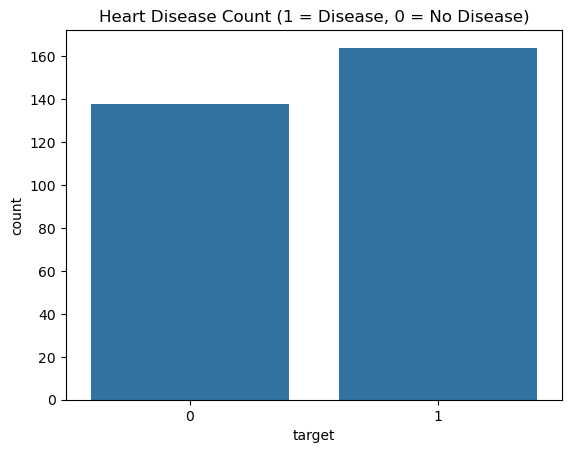

In [15]:
#  a. Patients with and without heart disease
sns.countplot(x='target', data=df)
plt.title("Heart Disease Count (1 = Disease, 0 = No Disease)")
plt.show()

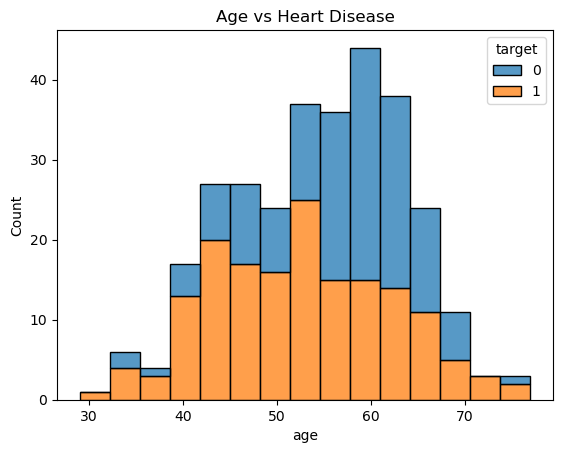

In [20]:
# b. Age vs Target
sns.histplot(data=df, x="age", hue="target", multiple="stack", bins=15)
plt.title("Age vs Heart Disease")
plt.show()

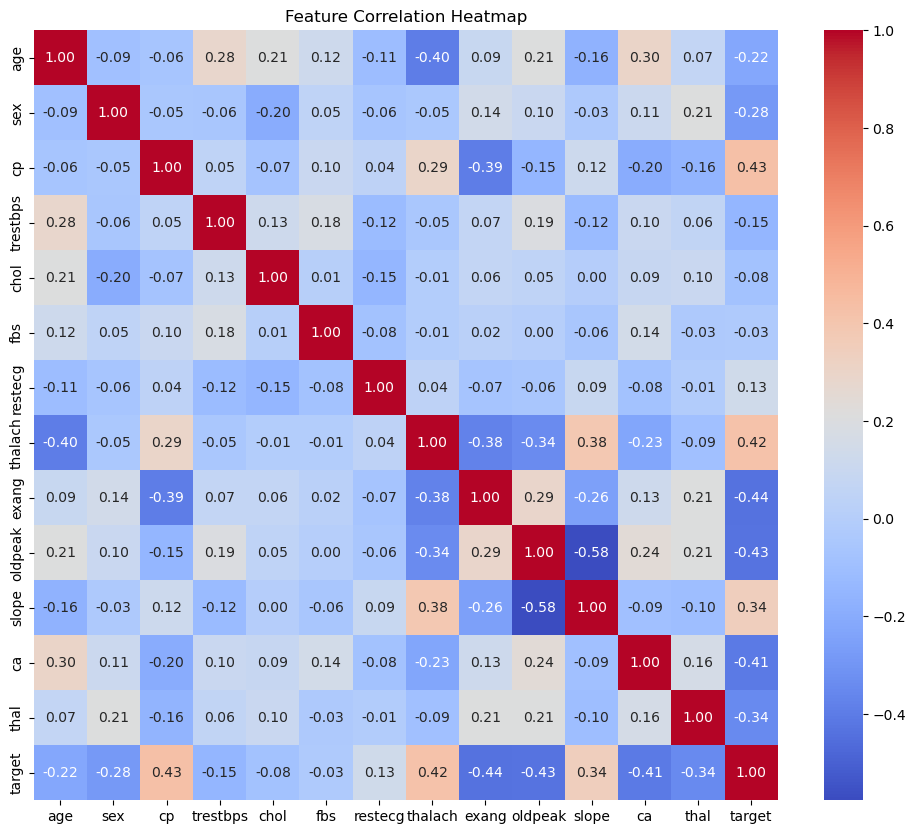

In [29]:
# c. Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Model Building

In [31]:
# Independent variable
x =df.drop(columns=["target"])

# Dependent variable
y= df["target"]

In [32]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [33]:
y #  0 = no disease and 1 = disease.

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [34]:
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size =0.30 , random_state = 42 )

In [35]:
# Model Creation

In [38]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [40]:
y_pred_lr = lr.predict(x_test)

cm_lr = confusion_matrix(y_test, y_pred_lr)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", acc_lr)
print("Confusion Matrix:\n", cm_lr)

Logistic Regression Accuracy: 0.8241758241758241
Confusion Matrix:
 [[33  9]
 [ 7 42]]


In [42]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train )

DecisionTreeClassifier(random_state=42)

In [43]:
y_pred_dt = dt.predict(x_test)

cm_dt = confusion_matrix(y_test, y_pred_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", acc_dt)
print("Confusion Matrix:\n", cm_dt)

Decision Tree Accuracy: 0.8241758241758241
Confusion Matrix:
 [[37  5]
 [11 38]]


In [44]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
y_pred_rf = rf.predict(x_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)
print("Confusion Matrix:\n", cm_rf)

Random Forest Accuracy: 0.8461538461538461
Confusion Matrix:
 [[36  6]
 [ 8 41]]


In [47]:
# A. Print Confusion Matrices
print("Logistic Regression Confusion Matrix:\n", cm_lr)
print("Decision Tree Confusion Matrix:\n", cm_dt)
print("Random Forest Confusion Matrix:\n", cm_rf)

Logistic Regression Confusion Matrix:
 [[33  9]
 [ 7 42]]
Decision Tree Confusion Matrix:
 [[37  5]
 [11 38]]
Random Forest Confusion Matrix:
 [[36  6]
 [ 8 41]]


In [53]:
# B. Print Classification Reports
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.82      0.86      0.84        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        42
           1       0.88      0.78      0.83        49

    accuracy                           0.82        91
   macro avg       0.83      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91

Random Forest Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84        42
           1       0.87      0.84      0.85        49

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        9

In [56]:
# C. Calculate Recall, Precision, and F1 Score
evaluation = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr),
                 accuracy_score(y_test, y_pred_dt),
                 accuracy_score(y_test, y_pred_rf)],
    'Precision': [precision_score(y_test, y_pred_lr),
                  precision_score(y_test, y_pred_dt),
                  precision_score(y_test, y_pred_rf)],
    'Recall': [recall_score(y_test, y_pred_lr),
               recall_score(y_test, y_pred_dt),
               recall_score(y_test, y_pred_rf)],
    'F1 Score': [f1_score(y_test, y_pred_lr),
                 f1_score(y_test, y_pred_dt),
                 f1_score(y_test, y_pred_rf)]
})


In [59]:
# Display the evaluation summary
print("\nEvaluation Summary:\n", evaluation)


Evaluation Summary:
                  Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.824176   0.823529  0.857143  0.840000
1        Decision Tree  0.824176   0.883721  0.775510  0.826087
2        Random Forest  0.846154   0.872340  0.836735  0.854167


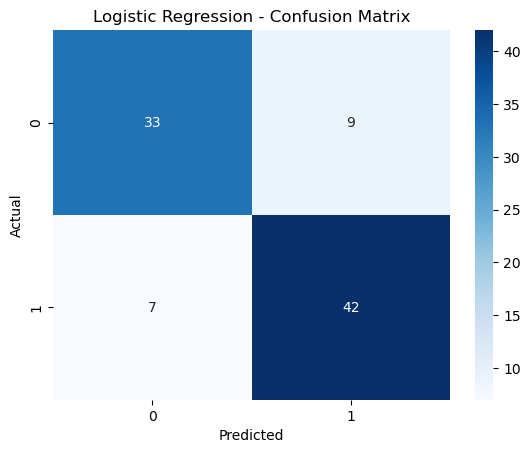

In [64]:
# Heatmap: Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

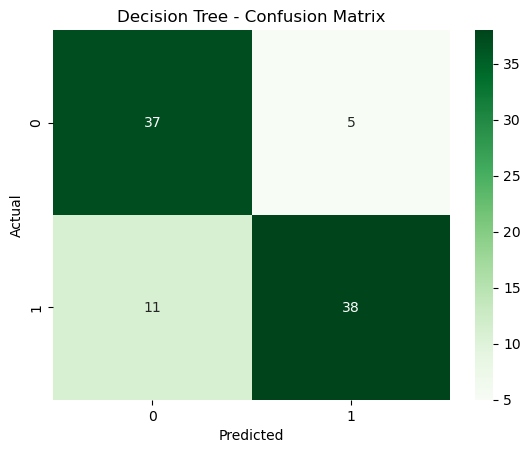

In [67]:
# Heatmap: Decision Tree
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

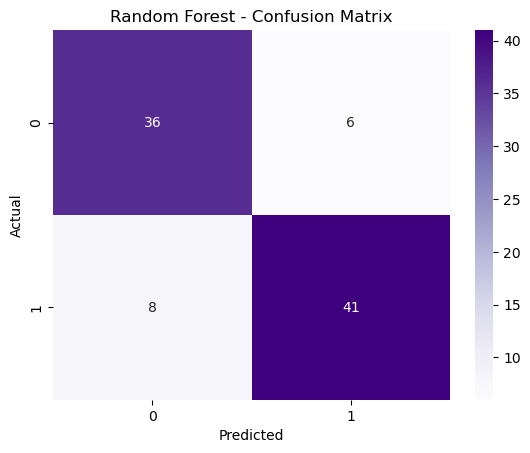

In [68]:
# Heatmap: Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [71]:
# Find model with highest accuracy
best_model = evaluation.loc[evaluation['Accuracy'].idxmax()]
print("\nBest Model Based on Accuracy:")
print(best_model)


Best Model Based on Accuracy:
Model        Random Forest
Accuracy          0.846154
Precision          0.87234
Recall            0.836735
F1 Score          0.854167
Name: 2, dtype: object


In [74]:
from sklearn.model_selection import GridSearchCV

In [76]:
# Create a new model to apply hyper-parameter tuning on it:
rf_2 = RandomForestClassifier(random_state=42)

In [78]:
# Create a grid of all parameters that you want to try:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [1, 5, 10, 15],
    "criterion" :["gini" , "entropy"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}
# Random state = 0 default values , max depth = 8-10 default value
# n_estimator = The number of decision trees that the random forest will build
# criterion = Decides how to split the node of tree
# max_depth = How deep the tree can go
# min_samples_split = Minimum data points needed to split a node
# min_samples_leaf =  Minimum data points required in a left

In [80]:
# GridSearchCV
grid_search = GridSearchCV(estimator=rf_2,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=1)

# estimator = Model on which you want to apply Hyper paramater tuning
# param_grid = DIctionary having all the parameters to be try
# cv = Cross validation
# scoring='accuracy' tells GridSearchCV to evaluate models using accuracy score
# verbose=1 shows progress messages during model fitting

In [82]:
# Fit on training data
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [83]:
# Best parameters
print("Best Parameters Found:\n", grid_search.best_params_)

Best Parameters Found:
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [84]:
# Build a final model by using these best paramaters
final_model = grid_search.best_estimator_

In [85]:
y_pred_rf_tuned = final_model.predict(x_test)

In [86]:
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
acc_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)

print("Tuned Random Forest Accuracy:", acc_rf_tuned)
print("Confusion Matrix:\n", cm_rf_tuned)
print("Classification Report:\n", classification_report(y_test, y_pred_rf_tuned))

Tuned Random Forest Accuracy: 0.8461538461538461
Confusion Matrix:
 [[34  8]
 [ 6 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83        42
           1       0.84      0.88      0.86        49

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



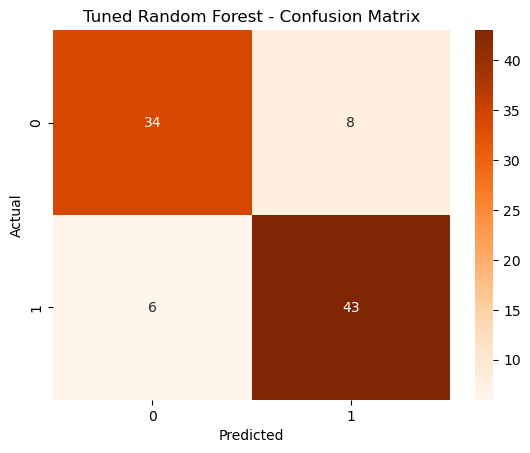

In [87]:
# Visualize Tuned Confusion Matrix
sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='Oranges')
plt.title("Tuned Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()